Explaratory Data Analysis

In [3]:
%cd

/root


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os

folder_path = '/content/drive/MyDrive/data'

# List all files and subfolders in the folder
contents = os.listdir(folder_path)

# Print the list of contents
for item in contents:
    print(item)

economy
politics
tamazight
science
culture
file1.csv


In [7]:
print("Classes names:\n",contents)

Classes names:
 ['economy', 'politics', 'tamazight', 'science', 'culture', 'file1.csv']


In [8]:
import glob
import pandas as pd

# Define the categories
categories = ['economy', 'politics', 'tamazight', 'science', 'culture']

# Initialize an empty list to store DataFrame rows
data = []

# Loop over the categories
for category in categories:
    # Get a list of all files in the current category directory
    files = glob.glob(f"/content/drive/MyDrive/data/{category}/*.txt")

    # Loop over the files
    for file in files:
        # Open the file and read the text
        with open(file, 'r', encoding='utf-8') as f:
            text = f.read()

        # Add the data to the list
        data.append({"category": category, "text": text})

# Create the DataFrame
df = pd.DataFrame(data)

In [9]:
df

,category,text
0,economy,الحكومة تقر بعدم وصول أسطول النقل البحري إلى م...
1,economy,هل بدأت العملات الرقمية تفقد بريقها؟ \n\n يرى ...
2,economy,"رأي استشاري ينادي بتشجيع الاقتصاد الدائري و""تش..."
3,economy,اللاجئون الأفغان في إيران.. أعداد متزايدة وأزم...
4,economy,الليرة اللبنانية تتراجع إلى مستوى قياسي وتسجل ...
...,...,...
3290,culture,معرض القاهرة الدولي للكتاب في دورته الـ53 يبرز...
3291,culture,نسب النبي محمد صلى الله عليه وسلم وأسماؤه وأول...
3292,culture,معرض فوتوغرافي ينعقد بمدينة طنجة \n\n يحط “الت...
3293,culture,‪مؤلف جماعي يرصد مدخلات وسيناريوهات حل نزاع ال...


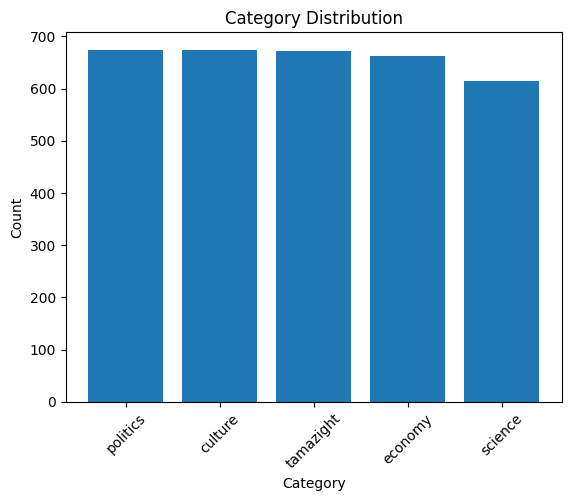

In [10]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each category
category_counts = df['category'].value_counts()

# Create a bar chart
plt.bar(category_counts.index, category_counts.values)

# Set the plot title and labels
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

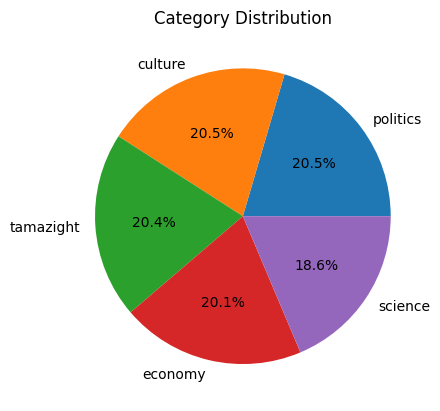

In [16]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each category
category_counts = df['category'].value_counts()

# Create a pie chart
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')

# Set the plot title
plt.title('Category Distribution')

# Display the plot
plt.show()

In [12]:
df['category'].value_counts()


politics     674
culture      674
tamazight    671
economy      662
science      614
Name: category, dtype: int64

In [13]:
import pandas as pd

# Convert the list to a DataFrame
data_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
data_df.to_csv('file1.csv', index=False)

In [14]:
# Convert the list to a DataFrame
data_df = pd.DataFrame(data)

# Check for null values
null_counts = data_df.isnull().sum()

# Print the null value counts
print(null_counts)

category    0
text        0
dtype: int64


Text Preprocessing for Machine Learning

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download stop words and the WordNet lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the stop words
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove special characters
    text = re.sub(r'\W', ' ', text)

    # Transform text to lower case
    text = text.lower()

    # Remove single characters
    text = re.sub(r'\s+[a-z]\s+', ' ', text)

    # Substitute multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    # Remove stop words and lemmatize the words
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]

    # Join the words back into a single string
    text = ' '.join(text)

    return text

# Apply the cleaning function to the 'text' column in the DataFrame
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the original and cleaned text for the first 5 rows
print(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0  الحكومة تقر بعدم وصول أسطول النقل البحري إلى م...   
1  هل بدأت العملات الرقمية تفقد بريقها يرى المبش ...   
2  رأي استشاري ينادي بتشجيع الاقتصاد الدائري و تش...   
3  اللاجئون الأفغان في إيران أعداد متزايدة وأزمة ...   
4  الليرة اللبنانية تتراجع إلى مستوى قياسي وتسجل ...   

                                        cleaned_text  
0  الحكومة تقر بعدم وصول أسطول النقل البحري إلى م...  
1  هل بدأت العملات الرقمية تفقد بريقها يرى المبش ...  
2  رأي استشاري ينادي بتشجيع الاقتصاد الدائري و تش...  
3  اللاجئون الأفغان في إيران أعداد متزايدة وأزمة ...  
4  الليرة اللبنانية تتراجع إلى مستوى قياسي وتسجل ...  


In [30]:
df

,category,text,CleanText,cleaned_text
0,economy,الحكومة تقر بعدم وصول أسطول النقل البحري إلى م...,الحكومة تقر بعدم وصول أسطول النقل البحري إلى م...,الحكومة تقر بعدم وصول أسطول النقل البحري إلى م...
1,economy,هل بدأت العملات الرقمية تفقد بريقها يرى المبش ...,هل بدأت العملات الرقمية تفقد بريقها \n\n يرى ...,هل بدأت العملات الرقمية تفقد بريقها يرى المبش ...
2,economy,رأي استشاري ينادي بتشجيع الاقتصاد الدائري و تش...,رأي استشاري ينادي بتشجيع الاقتصاد الدائري وتشر...,رأي استشاري ينادي بتشجيع الاقتصاد الدائري و تش...
3,economy,اللاجئون الأفغان في إيران أعداد متزايدة وأزمة ...,اللاجئون الأفغان في إيران أعداد متزايدة وأزمة ...,اللاجئون الأفغان في إيران أعداد متزايدة وأزمة ...
4,economy,الليرة اللبنانية تتراجع إلى مستوى قياسي وتسجل ...,الليرة اللبنانية تتراجع إلى مستوى قياسي وتسجل ...,الليرة اللبنانية تتراجع إلى مستوى قياسي وتسجل ...
...,...,...,...,...
3290,culture,معرض القاهرة الدولي للكتاب في دورته الـ53 يبرز...,معرض القاهرة الدولي للكتاب في دورته الـ يبرز ه...,معرض القاهرة الدولي للكتاب في دورته الـ53 يبرز...
3291,culture,نسب النبي محمد صلى الله عليه وسلم وأسماؤه وأول...,نسب النبي محمد صلى الله عليه وسلم وأسماؤه وأول...,نسب النبي محمد صلى الله عليه وسلم وأسماؤه وأول...
3292,culture,معرض فوتوغرافي ينعقد بمدينة طنجة يحط التصوير ا...,معرض فوتوغرافي ينعقد بمدينة طنجة \n\n يحط الت...,معرض فوتوغرافي ينعقد بمدينة طنجة يحط التصوير ا...
3293,culture,مؤلف جماعي يرصد مدخلات وسيناريوهات حل نزاع الص...,مؤلف جماعي يرصد مدخلات وسيناريوهات حل نزاع الص...,مؤلف جماعي يرصد مدخلات وسيناريوهات حل نزاع الص...


Supervised Models

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['category'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize the models
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
svc_model = SVC()

# Train and evaluate the Logistic Regression model
logistic_regression_model.fit(X_train_vec, y_train)
y_pred_lr = logistic_regression_model.predict(X_test_vec)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Train and evaluate the Random Forest Classifier model
random_forest_model.fit(X_train_vec, y_train)
y_pred_rf = random_forest_model.predict(X_test_vec)
print("Random Forest Classifier:\n", classification_report(y_test, y_pred_rf))

# Train and evaluate the Support Vector Classifier model
svc_model.fit(X_train_vec, y_train)
y_pred_svc = svc_model.predict(X_test_vec)
print("Support Vector Classifier:\n", classification_report(y_test, y_pred_svc))

# Now to predict on new data
new_data = ["العملات الرقمية تؤثر على اقتصاد الدولة "]  # replace with your actual new data

# Vectorize the new data in the same way as your training and testing data
new_data_vec = vectorizer.transform(new_data)

# Use the trained SVC model to make predictions
predictions = svc_model.predict(new_data_vec)

print("Predictions on new data:", predictions)

Logistic Regression:
               precision    recall  f1-score   support

     culture       0.91      0.96      0.93       127
     economy       0.95      0.94      0.94       157
    politics       0.91      0.93      0.92       126
     science       0.96      0.97      0.97       115
   tamazight       0.98      0.91      0.95       134

    accuracy                           0.94       659
   macro avg       0.94      0.94      0.94       659
weighted avg       0.94      0.94      0.94       659

Random Forest Classifier:
               precision    recall  f1-score   support

     culture       0.89      0.93      0.91       127
     economy       0.91      0.88      0.89       157
    politics       0.84      0.85      0.85       126
     science       0.96      0.98      0.97       115
   tamazight       0.96      0.93      0.95       134

    accuracy                           0.91       659
   macro avg       0.91      0.91      0.91       659
weighted avg       0.91     

In [41]:
from sklearn.metrics import accuracy_score

# Dictionary to hold model names and their accuracies
model_accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Random Forest Classifier': accuracy_score(y_test, y_pred_rf),
    'Support Vector Classifier': accuracy_score(y_test, y_pred_svc),
}

# Find the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)

print(f'The best model is {best_model} with an accuracy of {model_accuracies[best_model]}')

The best model is Support Vector Classifier with an accuracy of 0.9438543247344461
